<a href="https://colab.research.google.com/github/aryadh5/datascience-talenthubkemnaker/blob/main/arya_session5_ML_dskemnaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [10]:
#predicting between lychee vs apple vs durian based on diameter in centimeter
import numpy as np
from sklearn import linear_model
#single independent variable as the fruit diameter
#logistic regression could have multiple independent variables as a feature
X = np.array([3.1, 19.7, 21.5, 6.7, 4.9, 5.0, 5.8, 20.4, 4.3, 9.4]).reshape(-1,1)


#dependent variable as the fruit label
# 1 for Lychee
# 2 for Apple
# 3 for Durian
Y = np.array([1, 3, 3, 2, 1, 2, 2, 3, 1, 2])
#using the logistic regression from sklearn
logr = linear_model.LogisticRegression()
#fit the data into model
logr.fit(X,Y)
#predict what kind of fruit that have diameter of 4.5cm:
predicted = logr.predict(np.array([4.5]).reshape(-1,1)) #reshaping for output label (row,col) to array([[ 1],[ 2],[ 3]])
#making a conditional statement for the better output
if predicted == [1]:
    print("It's a Lychee")
elif predicted == [2]:
    print(("It's an Apple"))
elif predicted == [3]:
    print(("It's a Durian"))

It's a Lychee


Neural Network

In [11]:
#install the supporting packages
!pip install gdown
#download the dataset
import gdown
url = 'https://drive.google.com/uc?id=1yAE_yLn_GVUMldHwVw-yg3EZtvckyKbQ'
output = 'titanic.zip'
gdown.download(url, output)
#extract the dataset
from zipfile import ZipFile
# loading the temp.zip and creating a zip object
with ZipFile("/content/titanic.zip", 'r') as FILE:
    # Extracting all the members of the zip
    # into a specific location.
    FILE.extractall(path="/content")
#load the csv dataset into pandas dataframe
import pandas as pd
train_titanic=pd.read_csv("/content/train.csv")
test_titanic=pd.read_csv("/content/test.csv")

Downloading...
From: https://drive.google.com/uc?id=1yAE_yLn_GVUMldHwVw-yg3EZtvckyKbQ
To: /content/titanic.zip
100%|██████████| 34.9k/34.9k [00:00<00:00, 44.7MB/s]


In [13]:
train_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
#assume that we already done the feature engineering process
#we want to choose column: Pclass, Sex, Embarked, Title on Name, Fare, Age, and Cabin
#download the preprocess data
url = 'https://drive.google.com/uc?id=1TsZaE5UUjWdy93gV-ZzL0C9XPnukvkwK'
output = '/content/preprocess_data.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1TsZaE5UUjWdy93gV-ZzL0C9XPnukvkwK
To: /content/preprocess_data.csv
100%|██████████| 141k/141k [00:00<00:00, 50.4MB/s]


'/content/preprocess_data.csv'

In [15]:
#load the preprocess data
final_data = pd.read_csv('/content/preprocess_data.csv')
final_data

,Pclass_1,Pclass_2,Pclass_3,Sex,Embarked_C,Embarked_Q,Embarked_S,Miss,Mr,Mrs,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,FamilySize,Family_Single,Family_Small,Family_Large
0,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0.073352,0,1,0
1,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0.073352,0,1,0
2,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1,-0.558346,1,0,0
3,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0.073352,0,1,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,-0.558346,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,-0.558346,1,0,0
1305,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,-0.558346,1,0,0
1306,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,-0.558346,1,0,0
1307,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,-0.558346,1,0,0


In [16]:
#split the data into training and validation sets
from sklearn.model_selection import train_test_split
labels = train_titanic.Survived
train_features, val_features, train_labels, val_labels = train_test_split(final_data[:891],
                                                                          labels,
                                                                          test_size = 0.2,
                                                                          random_state=42, #for reproducible
                                                                          shuffle=False)
#this to reveal the split information
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape

((712, 27), (712,), (179, 27), (179,))

In [17]:
#using keras library to build the model
import tensorflow as tf
from keras import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout
# define the sequential model
model = Sequential()
model.add(Dense(128, input_shape=(27,), activation='relu', #27 is the number of features that we used on train set
                kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5)))
model.add(Dense(1, activation='sigmoid')) #1 is the output label

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
# Compile the model with Adam optimizer:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Define a learning rate decay method:
lr_decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                patience=1,
                                                verbose=0,
                                                factor=0.2,
                                                min_lr=1e-3)
# fit the dataset into our model
training_process = model.fit(x=train_features,
                             y=train_labels,
                             validation_data=(val_features, val_labels),
                             epochs=300,
                             verbose=2,
                             callbacks=[lr_decay])

Epoch 1/300
23/23 - 4s - 154ms/step - accuracy: 0.5604 - loss: 4.1163 - val_accuracy: 0.6760 - val_loss: 3.6336 - learning_rate: 0.0010
Epoch 2/300
23/23 - 0s - 12ms/step - accuracy: 0.6362 - loss: 3.2749 - val_accuracy: 0.7151 - val_loss: 2.8327 - learning_rate: 0.0010
Epoch 3/300
23/23 - 0s - 6ms/step - accuracy: 0.6924 - loss: 2.5453 - val_accuracy: 0.8659 - val_loss: 2.1235 - learning_rate: 0.0010
Epoch 4/300
23/23 - 0s - 4ms/step - accuracy: 0.7809 - loss: 1.9314 - val_accuracy: 0.8547 - val_loss: 1.5583 - learning_rate: 0.0010
Epoch 5/300
23/23 - 0s - 5ms/step - accuracy: 0.7921 - loss: 1.4379 - val_accuracy: 0.8715 - val_loss: 1.1718 - learning_rate: 0.0010
Epoch 6/300
23/23 - 0s - 5ms/step - accuracy: 0.8118 - loss: 1.1332 - val_accuracy: 0.8492 - val_loss: 0.8811 - learning_rate: 0.0010
Epoch 7/300
23/23 - 0s - 5ms/step - accuracy: 0.8034 - loss: 0.8847 - val_accuracy: 0.8492 - val_loss: 0.6911 - learning_rate: 0.0010
Epoch 8/300
23/23 - 0s - 6ms/step - accuracy: 0.7978 - loss

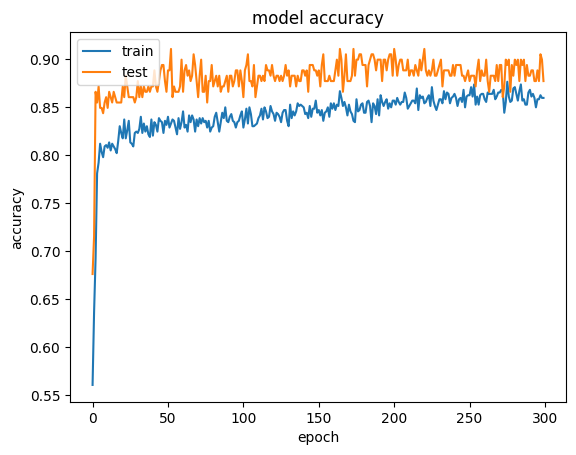

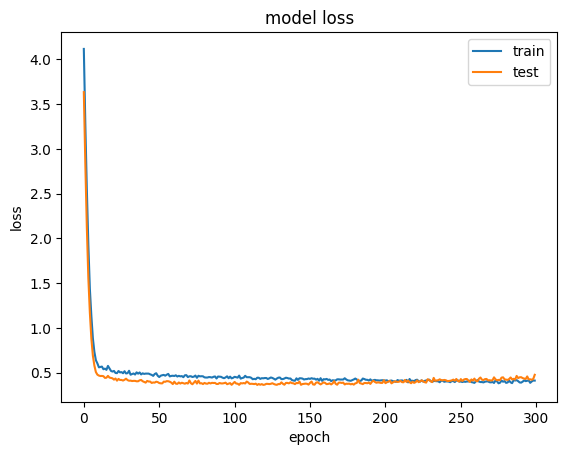

Example of Goodfitting Graph


In [19]:
#Evaluating the model
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training_process.history['accuracy'])
plt.plot(training_process.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_process.history['loss'])
plt.plot(training_process.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
print('Example of Goodfitting Graph')

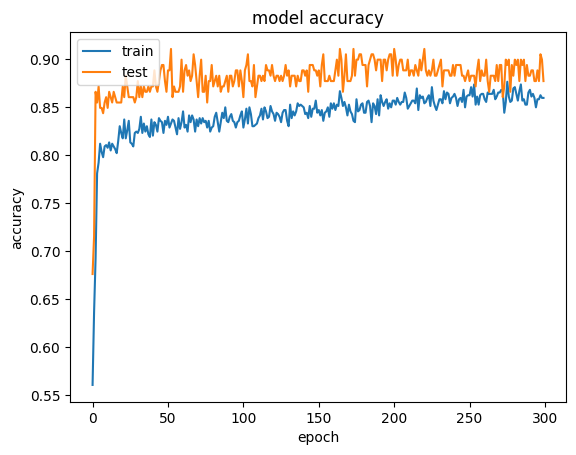

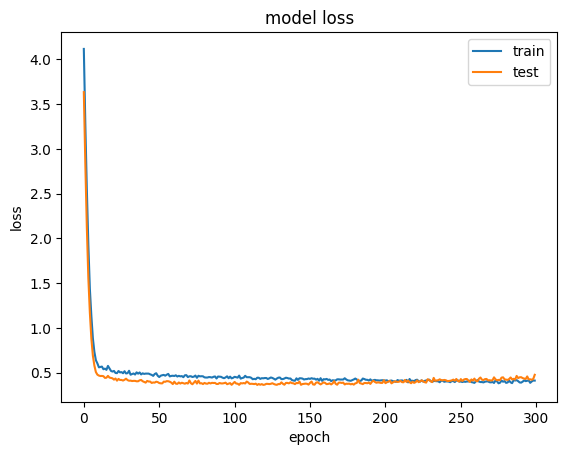

Example of Goodfitting Graph


In [21]:
#Evaluating the model
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training_process.history['accuracy'])
plt.plot(training_process.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(training_process.history['loss'])
plt.plot(training_process.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
print('Example of Goodfitting Graph')

In [20]:
#making a prediction using the model
test_features = final_data[891:]
prediction = model.predict(test_features)
prediction = prediction.round(0) #round to 0 digit after the comma -> 0.739 to 1
print(prediction.shape) #must using np.squeeze to convert into one dimensional array -> (418,)
#create a dataframe to view the prediction
prediction = pd.DataFrame({"PassengerId": test_titanic["PassengerId"],
                           "Survived": np.squeeze(prediction)}).sort_values(by="PassengerId")
prediction #please matching with the gender_submission.csv, how much the difference

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
(418, 1)


,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [24]:
import gdown
#download the iris data
url = 'https://drive.google.com/uc?id=1YOHG5CSQHqCbXoJIDPCtEX4_QTeJnrXM'
output = '/content/iris_data.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1YOHG5CSQHqCbXoJIDPCtEX4_QTeJnrXM
To: /content/iris_data.csv
100%|██████████| 5.11k/5.11k [00:00<00:00, 11.5MB/s]


'/content/iris_data.csv'

In [26]:
import pandas as pd
iris_data = pd.read_csv('/content/iris_data.csv')
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
#label is still on string must be transform using one-hot encoding
labels = pd.get_dummies(iris_data.Species)
labels

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [28]:
features = iris_data.loc[:, "SepalLengthCm":"PetalWidthCm"] #[start:stop row, start:stop column]
features

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
#split the data into training and validation sets
from sklearn.model_selection import train_test_split
train_features, val_features, train_labels, val_labels = train_test_split(features,
                                                                          labels,
                                                                          test_size = 0.25,
                                                                          random_state=42, #for reproducible
                                                                          shuffle=False)
#this to reveal the split information
train_features.shape, train_labels.shape, val_features.shape, val_labels.shape

((112, 4), (112, 3), (38, 4), (38, 3))

In [30]:
#using keras library to build the model
import tensorflow as tf
from keras import Sequential
from keras import regularizers
from keras.layers import Dense, Dropout
# define the sequential model
model = Sequential()
model.add(Dense(128, input_shape=(4,), activation='relu', #4 is the number of features that we used on train set
                kernel_regularizer=regularizers.L1L2(l1=1e-2, l2=1e-2)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-4, l2=1e-4)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu',
                kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-5)))
model.add(Dense(3, activation='softmax')) #3 is the output label

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
# Compile the model with Adam optimizer:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', #use sparse_categorical_crossentropy if not one-hot encoded [1],[2],[3]
              metrics=['accuracy'])
# Define a learning rate decay method:
lr_decay = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                patience=1,
                                                verbose=0,
                                                factor=0.2,
                                                min_lr=1e-3)

In [33]:
# fit the dataset into our model
training_process = model.fit(x=train_features,
                             y=train_labels,
                             validation_data=(val_features, val_labels),
                             epochs=300,
                             verbose=2,
                             callbacks=[lr_decay])

Epoch 1/300
4/4 - 5s - 1s/step - accuracy: 0.3929 - loss: 1.7624 - val_accuracy: 0.0000e+00 - val_loss: 2.0725 - learning_rate: 0.0010
Epoch 2/300
4/4 - 0s - 83ms/step - accuracy: 0.4643 - loss: 1.7052 - val_accuracy: 0.0000e+00 - val_loss: 2.0362 - learning_rate: 0.0010
Epoch 3/300
4/4 - 0s - 18ms/step - accuracy: 0.4911 - loss: 1.6418 - val_accuracy: 0.0000e+00 - val_loss: 2.0751 - learning_rate: 0.0010
Epoch 4/300
4/4 - 0s - 15ms/step - accuracy: 0.5179 - loss: 1.5982 - val_accuracy: 0.0000e+00 - val_loss: 2.1790 - learning_rate: 0.0010
Epoch 5/300
4/4 - 0s - 21ms/step - accuracy: 0.5804 - loss: 1.5707 - val_accuracy: 0.0000e+00 - val_loss: 2.2686 - learning_rate: 0.0010
Epoch 6/300
4/4 - 0s - 18ms/step - accuracy: 0.5536 - loss: 1.5433 - val_accuracy: 0.0000e+00 - val_loss: 2.2810 - learning_rate: 0.0010
Epoch 7/300
4/4 - 0s - 14ms/step - accuracy: 0.6696 - loss: 1.4658 - val_accuracy: 0.0000e+00 - val_loss: 2.2160 - learning_rate: 0.0010
Epoch 8/300
4/4 - 0s - 21ms/step - accuracy

**Linear Regression**

---



In [34]:
#predicting temperature with multiple factors
import numpy as np
from sklearn import linear_model
# Multiple Independent variables: humidity, rain (0 or 1), wind speed
X = np.array([
    [0.89, 0, 5.2],
    [0.93, 1, 3.8],
    [0.55, 0, 7.1],
    [0.24, 1, 2.4],
    [0.37, 0, 4.5],
    [0.66, 1, 6.0],
    [0.59, 0, 5.5],
    [0.85, 1, 3.2],
    [0.73, 0, 4.8],
    [0.42, 1, 2.9]
])
# Dependent variable: temperature in Celsius
Y = np.array([8.5, 7.5, 17.8, 26.3, 22.8, 14.7, 18.8, 9.5, 12.6, 21.4])
# Using the linear regression from sklearn
linr = linear_model.LinearRegression()
# Fit the data into the model
linr.fit(X, Y)
# Predict the temperature if the humidity is 97%, it is raining, and the wind speed is 4.0
predicted = linr.predict(np.array([[0.97, 1, 4.0]]))
print(predicted[0], "degree Celsius")

6.2060587499113495 degree Celsius


In [35]:
import gdown
#download the data
url = 'https://drive.google.com/uc?id=1z9QM3Yy1fw58sayP0lxs-N93HtfZwf1S'
output = '/content/Housing.csv'
gdown.download(url, output)

import pandas as pd
# load the data
df = pd.read_csv('/content/Housing.csv')
df.info()
df

Downloading...
From: https://drive.google.com/uc?id=1z9QM3Yy1fw58sayP0lxs-N93HtfZwf1S
To: /content/Housing.csv
100%|██████████| 30.0k/30.0k [00:00<00:00, 43.1MB/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [36]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to columns with object data type
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [37]:
# Get Dataframe Correlation for helping feature selection
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [38]:
# Select only 7 impactful features to improve model performance
df = df[['price','area','bathrooms','airconditioning','stories','parking','bedrooms','furnishingstatus']]
df

,price,area,bathrooms,airconditioning,stories,parking,bedrooms,furnishingstatus
0,13300000,7420,2,1,3,2,4,0
1,12250000,8960,4,1,4,3,4,0
2,12250000,9960,2,0,2,2,3,1
3,12215000,7500,2,1,2,3,4,0
4,11410000,7420,1,1,2,2,4,0
...,...,...,...,...,...,...,...,...
540,1820000,3000,1,0,1,2,2,2
541,1767150,2400,1,0,1,0,3,1
542,1750000,3620,1,0,1,0,2,2
543,1750000,2910,1,0,1,0,3,0


In [39]:
from sklearn.model_selection import train_test_split
# Separate features and labels
features = df.drop(columns='price') # 7 features
labels = df['price'] # 1 label
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 7), (109, 7), (436,), (109,))

In [41]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Define the sequential model
model = Sequential()
model.add(Dense(128, input_shape=(7,), activation='relu'))  # 7 is the number of features
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))  # 1 is the output label

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# Compile the model with Adam optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss='mean_absolute_error',
              metrics=['mse'])
# Fit the dataset into our model
training_process = model.fit(x=X_train,
                             y=y_train,
                             validation_data=(X_test, y_test),
                             #use validation_split=0.2 same as train test split with test size 0.2
                             epochs=50,
                             verbose=2)

Epoch 1/50
14/14 - 3s - 179ms/step - loss: 4667856.0000 - mse: 24864601669632.0000 - val_loss: 4788668.5000 - val_mse: 27771258535936.0000
Epoch 2/50
14/14 - 0s - 9ms/step - loss: 3453800.7500 - mse: 15486145265664.0000 - val_loss: 1598404.3750 - val_mse: 4191944179712.0000
Epoch 3/50
14/14 - 0s - 5ms/step - loss: 2148420.5000 - mse: 8175479685120.0000 - val_loss: 2006250.2500 - val_mse: 6561792524288.0000
Epoch 4/50
14/14 - 0s - 10ms/step - loss: 2005145.8750 - mse: 6587603222528.0000 - val_loss: 1515523.2500 - val_mse: 3810785230848.0000
Epoch 5/50
14/14 - 0s - 5ms/step - loss: 1935320.7500 - mse: 6702741061632.0000 - val_loss: 1708207.0000 - val_mse: 4887576313856.0000
Epoch 6/50
14/14 - 0s - 9ms/step - loss: 1909760.0000 - mse: 6432995409920.0000 - val_loss: 1663785.1250 - val_mse: 4597288534016.0000
Epoch 7/50
14/14 - 0s - 9ms/step - loss: 1853285.8750 - mse: 6000273260544.0000 - val_loss: 1641687.7500 - val_mse: 4453822365696.0000
Epoch 8/50
14/14 - 0s - 9ms/step - loss: 1956339.

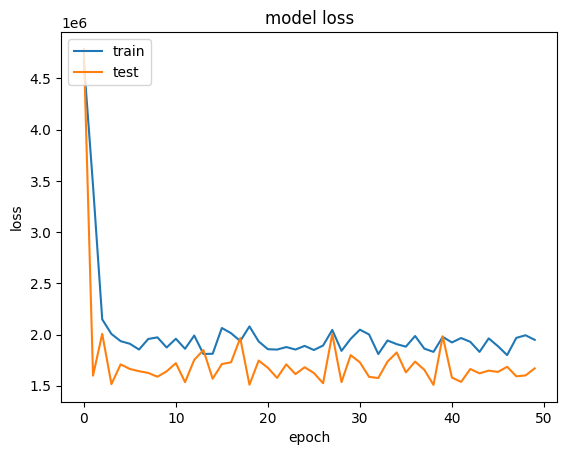

In [43]:
#Evaluating the model
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(training_process.history['loss'])
plt.plot(training_process.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
first_five_row = df.drop(columns='price').head().values
# Predicting the prices with neural network
predicted_prices = model.predict(first_five_row)
# Convert the predicted prices to a DataFrame
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Price'])
predicted_prices_df


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


,Predicted Price
0,5599444.5
1,6774819.0
2,7442770.0
3,5652563.0
4,5576612.0


In [45]:
# Select top 5 rows
comparison_df = df.head()
comparison_df

,price,area,bathrooms,airconditioning,stories,parking,bedrooms,furnishingstatus
0,13300000,7420,2,1,3,2,4,0
1,12250000,8960,4,1,4,3,4,0
2,12250000,9960,2,0,2,2,3,1
3,12215000,7500,2,1,2,3,4,0
4,11410000,7420,1,1,2,2,4,0


**`random fores`**

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
# load the data
df = pd.read_csv('/content/Housing.csv')
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to columns with object data type
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])
# Select only 7 impactful features to improve model performance
df = df[['price','area','bathrooms','airconditioning','stories','parking','bedrooms','furnishingstatus']]
from sklearn.model_selection import train_test_split
# Separate features and labels
features = df.drop(columns='price') # 7 features
labels = df['price'] # 1 label
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

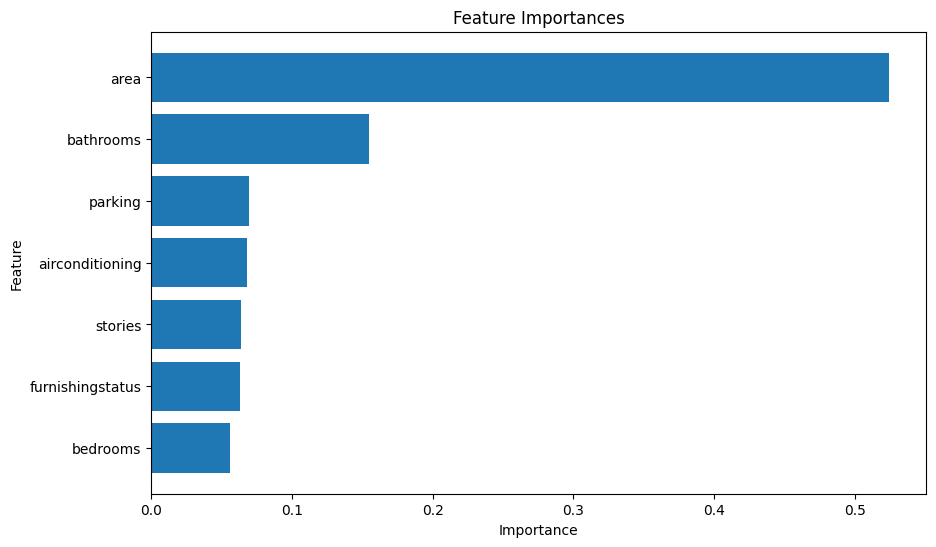

            Feature  Importance
0              area    0.524309
1         bathrooms    0.154647
4           parking    0.069476
2   airconditioning    0.068066
3           stories    0.064079
6  furnishingstatus    0.063372
5          bedrooms    0.056051


In [47]:
# Initialize the RandomForestRegressor
randomforest = RandomForestRegressor(random_state=42)
# Fit the model
randomforest.fit(X_train, y_train)
# Get feature importances
importances = randomforest.feature_importances_
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()
# Display the feature importances
print(feature_importances)

In [48]:
# Predicting the prices with random forest
predicted_prices_rf = randomforest.predict(first_five_row)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
# Predicting the prices with random forest
predicted_prices_rf = randomforest.predict(first_five_row)
# Convert the predicted prices to a DataFrame
predicted_prices_df_rf = pd.DataFrame(predicted_prices_rf, columns=['Predicted Price'])
predicted_prices_df_rf

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


,Predicted Price
0,8924318.2
1,11514650.0
2,5884480.0
3,10661309.4
4,9778580.0


In [50]:
# Select top 5 rows
comparison_df = df.head()
comparison_df

,price,area,bathrooms,airconditioning,stories,parking,bedrooms,furnishingstatus
0,13300000,7420,2,1,3,2,4,0
1,12250000,8960,4,1,4,3,4,0
2,12250000,9960,2,0,2,2,3,1
3,12215000,7500,2,1,2,3,4,0
4,11410000,7420,1,1,2,2,4,0


kmeans clustering


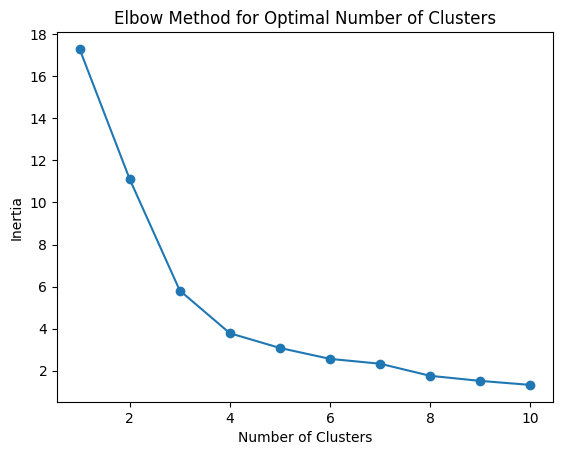

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Generate dummy data
np.random.seed(42)  # for replication
X = np.random.rand(100, 2)  # 100 samples with 2 features
# Use the elbow method to find the optimal number of clusters
inertia = []
# Test different numbers of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
# Plot the elbow method results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
# Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid
# More clusters means more centroid (number of cluster = number of centroid)
# Hence, the distance is way more closer to the centroid (cluster more compact)
plt.ylabel('Inertia')
plt.show()

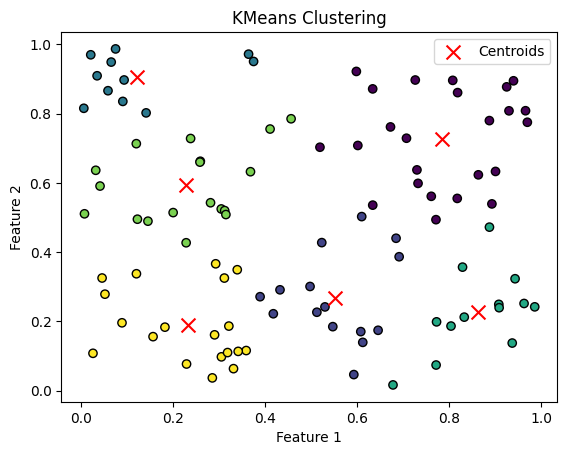

In [53]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()